In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import os, sys

def get_dir_n_levels_up(path, n):
    # Go up n levels from the given path
    for _ in range(n):
        path = os.path.dirname(path)
    return path

proj_root = get_dir_n_levels_up(os.path.abspath("__file__"), 4)
sys.path.append(proj_root)

import pandas as pd
import yaml
import torch
import collections

import warnings
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

warnings.filterwarnings("ignore")

from dqn.opinion_dynamics.utils.experiment import process_experiment


In [60]:
# experiment_sub_dir = "2025May02-101004_configs" # excellent run
experiment_sub_dir = "2025Jul01-141613_configs"

exp_path = os.path.join(os.path.abspath("."), "results", experiment_sub_dir)
df = process_experiment(
    exp_path
)
df.columns


Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'sub_exp_cfg_agent_params.args_.training_freq', 'sub_experiment_path',
       'seed', 'experiment_name'],


In [61]:
df

,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_exp_cfg_agent_params.args_.training_freq,sub_experiment_path,seed,experiment_name
0,training,200000,0.983159,-7.380671,-1.442521,-4.442603,-4.431700,0.837026,-6.902676,-1.414784,...,0.890582,0.627427,48749.0,96.0,0 days 00:07:03.206267,2000,4,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
1,training,400000,0.965886,-7.792339,-1.746956,-4.474000,-4.449678,0.839831,-7.275731,-1.705441,...,-0.329339,0.836134,50000.0,100.0,0 days 00:07:28.672905,2000,4,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
2,training,600000,0.948614,-7.580369,-1.516737,-4.446692,-4.416772,0.824773,-7.090354,-1.488443,...,-0.634564,1.129782,50000.0,100.0,0 days 00:07:56.100692,2000,4,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
3,training,800000,0.931341,-7.507868,-1.738659,-4.415485,-4.389950,0.825498,-7.013405,-1.696734,...,-0.725239,1.235835,50000.0,100.0,0 days 00:07:54.319024,2000,4,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
4,training,1000000,0.914068,-7.513511,-1.637147,-4.362384,-4.343620,0.817857,-7.027796,-1.603746,...,-0.746177,1.260025,50000.0,100.0,0 days 00:07:53.069239,2000,4,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,validation,11200000,NaN,-7.785173,-7.785126,-7.785152,-7.785153,0.000010,-7.298100,-7.298057,...,-1.413169,2.183112,NaN,NaN,0 days 00:00:00.710745,5000,8,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1436,validation,11400000,NaN,-7.881024,-7.880983,-7.881005,-7.881005,0.000010,-7.375956,-7.375918,...,-1.303822,2.192605,NaN,NaN,0 days 00:00:00.686618,5000,8,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1437,validation,11600000,NaN,-7.791441,-7.791382,-7.791408,-7.791409,0.000012,-7.303085,-7.303032,...,-1.441153,2.189411,NaN,NaN,0 days 00:00:00.704880,5000,8,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1438,validation,11800000,NaN,-7.791475,-7.791427,-7.791450,-7.791450,0.000012,-7.303253,-7.303211,...,-1.422806,2.194503,NaN,NaN,0 days 00:00:00.723586,5000,8,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...


In [62]:
# df[df['epoch_type'] == 'validation']
df[df['epoch_type'] == 'training']


,epoch_type,frame_stamp,greedy_epsilon,episode_rewards_min,episode_rewards_max,episode_rewards_mean,episode_rewards_median,episode_rewards_std,episode_discounted_rewards_min,episode_discounted_rewards_max,...,episode_max_qs_median,episode_max_qs_std,policy_trained_times,target_trained_times,epoch_time,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_exp_cfg_agent_params.args_.training_freq,sub_experiment_path,seed,experiment_name
0,training,200000,0.983159,-7.380671,-1.442521,-4.442603,-4.431700,0.837026,-6.902676,-1.414784,...,0.890582,0.627427,48749.0,96.0,0 days 00:07:03.206267,2000,4,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
1,training,400000,0.965886,-7.792339,-1.746956,-4.474000,-4.449678,0.839831,-7.275731,-1.705441,...,-0.329339,0.836134,50000.0,100.0,0 days 00:07:28.672905,2000,4,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
2,training,600000,0.948614,-7.580369,-1.516737,-4.446692,-4.416772,0.824773,-7.090354,-1.488443,...,-0.634564,1.129782,50000.0,100.0,0 days 00:07:56.100692,2000,4,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
3,training,800000,0.931341,-7.507868,-1.738659,-4.415485,-4.389950,0.825498,-7.013405,-1.696734,...,-0.725239,1.235835,50000.0,100.0,0 days 00:07:54.319024,2000,4,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
4,training,1000000,0.914068,-7.513511,-1.637147,-4.362384,-4.343620,0.817857,-7.027796,-1.603746,...,-0.746177,1.260025,50000.0,100.0,0 days 00:07:53.069239,2000,4,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,0,0000_agent_params.args_.target_model_update_fr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,training,11200000,0.050000,-7.223725,-1.347040,-4.233254,-4.223620,0.790709,-6.770643,-1.326363,...,-0.813192,1.313619,25000.0,40.0,0 days 00:04:51.154915,5000,8,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1376,training,11400000,0.050000,-7.264882,-1.377880,-4.221180,-4.207111,0.786699,-6.810081,-1.357674,...,-0.813357,1.309819,25000.0,40.0,0 days 00:04:52.502225,5000,8,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1377,training,11600000,0.050000,-7.370778,-1.840971,-4.240644,-4.232538,0.802034,-6.912416,-1.792725,...,-0.818687,1.317144,25000.0,40.0,0 days 00:04:48.492889,5000,8,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...
1378,training,11800000,0.050000,-7.264693,-1.318739,-4.223942,-4.209791,0.799273,-6.810185,-1.294134,...,-0.805787,1.311914,25000.0,40.0,0 days 00:04:42.885772,5000,8,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2,0003_agent_params.args_.target_model_update_fr...


In [63]:
# Define hyperparameter columns
hyperparam_columns = [col for col in df.columns if "sub_exp_cfg" in col]

# Group by hyperparameter values and compute mean episode_rewards_mean
averaged_results = df.groupby(hyperparam_columns, as_index=False).agg({
    'episode_rewards_mean': 'mean',  # Averaging the performance metric
    'sub_experiment_path': 'first'   # Keep a reference to an experiment path
})

# Find the best hyperparameter set based on the highest mean reward
best_row = averaged_results.loc[averaged_results['episode_rewards_mean'].idxmax()]

# Print the best experiment path and hyperparameters
print(f"Best hyperparameters:\n{best_row[hyperparam_columns]}")
print(f"Best mean reward: {best_row['episode_rewards_mean']}")

Best hyperparameters:
sub_exp_cfg_agent_params.args_.target_model_update_freq    5000
sub_exp_cfg_agent_params.args_.training_freq                  4
Name: 2, dtype: object
Best mean reward: -6.074335882802436


In [64]:
averaged_results

,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_exp_cfg_agent_params.args_.training_freq,episode_rewards_mean,sub_experiment_path
0,2000,4,-6.091053,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
1,2000,8,-6.179972,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
2,5000,4,-6.074336,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...
3,5000,8,-6.155086,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...


In [65]:
# selected_metric = 'episode_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"

# # Filter for validation episodes
# validation_df = df[df['epoch_type'] == 'validation']

# # Get the unique sorted frame_stamp values
# unique_frames = np.sort(validation_df['frame_stamp'].unique())
# N = 1
# # Get all frame_stamp values after the first N unique ones
# filtered_frames = unique_frames[N:]

# # Filter the DataFrame to only include rows with these frame_stamp values
# filtered_df = validation_df[validation_df['frame_stamp'].isin(filtered_frames)]

# plt.figure(figsize=(10, 6))
# sns.lineplot(data=filtered_df, x='frame_stamp', y=selected_metric, hue=hue_col)
# plt.ylabel(selected_metric)
# plt.xlabel('Frame Stamp')
# plt.show()

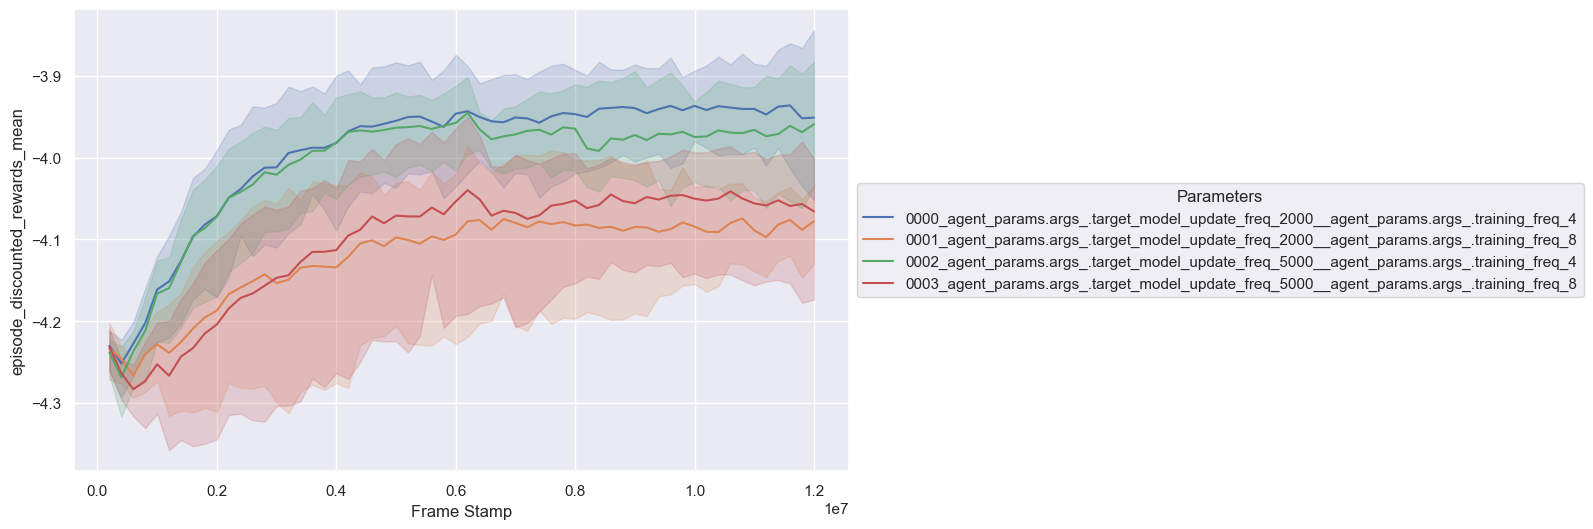

In [66]:

selected_metric = 'episode_discounted_rewards_mean'
# hue_col = "sub_exp_cfg_agent_params.args_.action_w_noise_amplitude"
hue_col = "experiment_name"

# validation_df = df[df['epoch_type'] == 'validation']
validation_df = df[df['epoch_type'] == 'training']


# Create a new figure for each environment
plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='frame_stamp', y=selected_metric, hue='model')
sns.lineplot(data=validation_df, 
             x='frame_stamp', 
             y=selected_metric, 
             hue=hue_col,
            #  units='seed', # Comment this to see mean + cf
            #  estimator=None, # Comment this to see mean + cf
             )

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Parameters')
plt.show()

In [67]:
df.columns

Index(['epoch_type', 'frame_stamp', 'greedy_epsilon', 'episode_rewards_min',
       'episode_rewards_max', 'episode_rewards_mean', 'episode_rewards_median',
       'episode_rewards_std', 'episode_discounted_rewards_min',
       'episode_discounted_rewards_max', 'episode_discounted_rewards_mean',
       'episode_discounted_rewards_median', 'episode_discounted_rewards_std',
       'episode_frames_min', 'episode_frames_max', 'episode_frames_mean',
       'episode_frames_median', 'episode_frames_std', 'episode_losses_min',
       'episode_losses_max', 'episode_losses_mean', 'episode_losses_median',
       'episode_losses_std', 'episode_max_qs_min', 'episode_max_qs_max',
       'episode_max_qs_mean', 'episode_max_qs_median', 'episode_max_qs_std',
       'policy_trained_times', 'target_trained_times', 'epoch_time',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'sub_exp_cfg_agent_params.args_.training_freq', 'sub_experiment_path',
       'seed', 'experiment_name'],


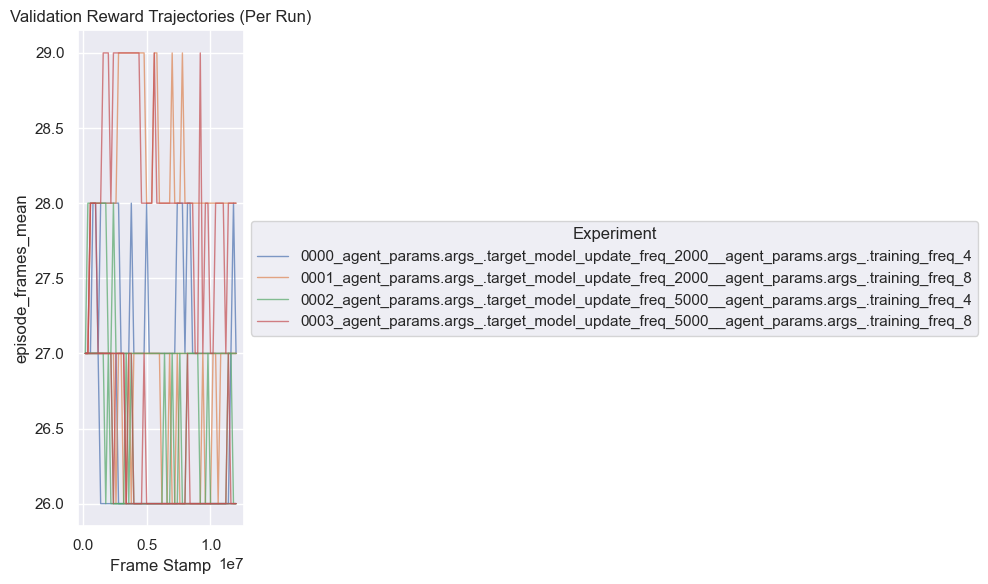

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_metric = 'episode_frames_mean'
hue_col = "experiment_name"  # or another distinguishing column like "sub_experiment_path"

validation_df = df[df['epoch_type'] == 'validation']

# Plot individual lines for each run
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=validation_df,
    x='frame_stamp',
    y=selected_metric,
    hue=hue_col,
    estimator=None,  # ← disables aggregation
    units='sub_experiment_path',  # ← groups lines by unique run
    lw=1,  # line width
    alpha=0.7  # transparency
)

plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.title('Validation Reward Trajectories (Per Run)')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Experiment')
plt.tight_layout()
plt.show()


In [69]:
### Select data

experiment_columns = [
    'epoch_type', 'frame_stamp',
    'episode_rewards_mean', 'episode_frames_mean', 
    'episode_discounted_rewards_mean',
    'policy_trained_times', 'target_trained_times', 'epoch_time', 
       'seed', 'experiment_name', "sub_experiment_path"
]
hyperparam_columns = [
   col for col in df.columns if "sub_exp_cfg" in col
]

cols_of_interest = experiment_columns + hyperparam_columns

sub_df = df[cols_of_interest]
sub_df = sub_df[sub_df['epoch_type'] == 'validation']
sub_df = sub_df[sub_df['frame_stamp'] == sub_df['frame_stamp'].max()]

sub_df 


,epoch_type,frame_stamp,episode_rewards_mean,episode_frames_mean,episode_discounted_rewards_mean,policy_trained_times,target_trained_times,epoch_time,seed,experiment_name,sub_experiment_path,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_exp_cfg_agent_params.args_.training_freq
119,validation,12000000,-8.114614,27.0,-7.591214,NaN,NaN,0 days 00:00:00.475353,0,0000_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2000,4
239,validation,12000000,-8.188712,27.0,-7.654937,NaN,NaN,0 days 00:00:00.432011,1,0000_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2000,4
359,validation,12000000,-7.808028,26.0,-7.321584,NaN,NaN,0 days 00:00:00.387244,2,0000_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2000,4
479,validation,12000000,-8.016468,27.0,-7.496867,NaN,NaN,0 days 00:00:00.563522,0,0001_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2000,8
599,validation,12000000,-8.099614,28.0,-7.561260,NaN,NaN,0 days 00:00:00.570419,1,0001_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2000,8
719,validation,12000000,-7.949601,27.0,-7.437405,NaN,NaN,0 days 00:00:00.616852,2,0001_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,2000,8
839,validation,12000000,-7.925164,26.0,-7.423651,NaN,NaN,0 days 00:00:00.387102,0,0002_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000,4
959,validation,12000000,-8.034893,27.0,-7.515459,NaN,NaN,0 days 00:00:00.352683,1,0002_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000,4
1079,validation,12000000,-7.835209,26.0,-7.344922,NaN,NaN,0 days 00:00:00.403705,2,0002_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000,4
1199,validation,12000000,-7.910270,26.0,-7.410844,NaN,NaN,0 days 00:00:00.545880,0,0003_agent_params.args_.target_model_update_fr...,d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dyna...,5000,8


In [70]:
agg_cols = [col for col in sub_df.columns if "sub_exp_cfg" in col]
aggregated_df = (
    sub_df.groupby(agg_cols)
    .agg(episode_discounted_rewards_mean=("episode_discounted_rewards_mean", "mean"))
    .reset_index()
)
aggregated_df

,sub_exp_cfg_agent_params.args_.target_model_update_freq,sub_exp_cfg_agent_params.args_.training_freq,episode_discounted_rewards_mean
0,2000,4,-7.522578
1,2000,8,-7.498511
2,5000,4,-7.428011
3,5000,8,-7.437048


In [71]:
sub_df.columns

Index(['epoch_type', 'frame_stamp', 'episode_rewards_mean',
       'episode_frames_mean', 'episode_discounted_rewards_mean',
       'policy_trained_times', 'target_trained_times', 'epoch_time', 'seed',
       'experiment_name', 'sub_experiment_path',
       'sub_exp_cfg_agent_params.args_.target_model_update_freq',
       'sub_exp_cfg_agent_params.args_.training_freq'],
      dtype='object')

In [72]:
print(sub_df[sub_df['episode_rewards_mean'] == sub_df['episode_rewards_mean'].max()]['sub_experiment_path'].values[0])



d:\Work\repos\RL\phd-rl-algos\dqn\opinion_dynamics\experiments\results\2025Jul01-141613_configs\0003_agent_params.args_.target_model_update_freq_5000__agent_params.args_.training_freq_8\2


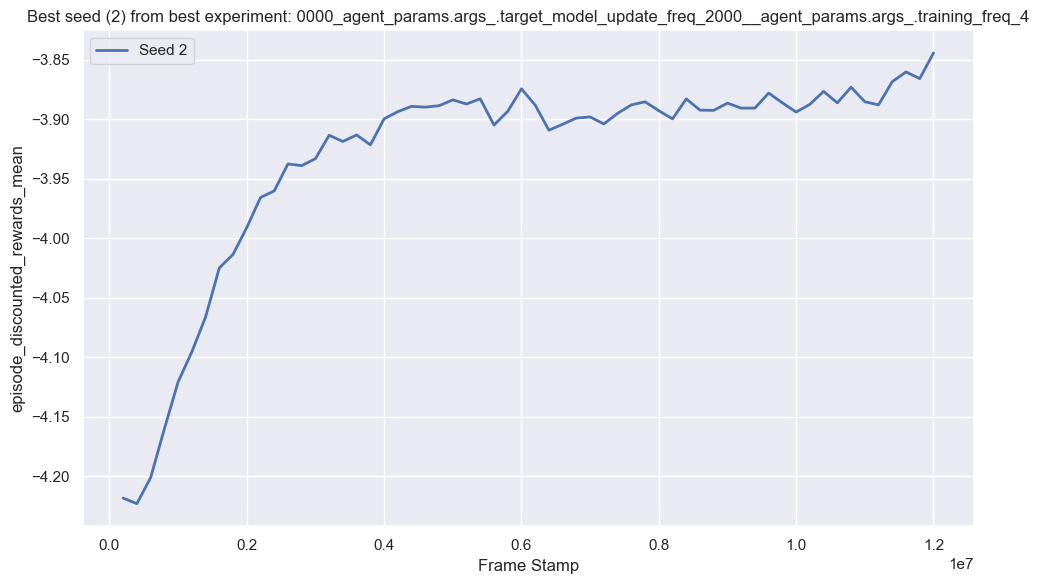

In [73]:
selected_metric = 'episode_discounted_rewards_mean'
hue_col = "experiment_name"

# Filter for training data only
training_df = df[df['epoch_type'] == 'training']
# training_df = df[df['epoch_type'] == 'validation']

# Step 1: Find best experiment
experiment_means = training_df.groupby(hue_col)[selected_metric].mean()
best_experiment = experiment_means.idxmax()

# Step 2: Filter to that experiment
best_exp_df = training_df[training_df[hue_col] == best_experiment]

# Step 3: Find best seed within best experiment
best_seed = (
    best_exp_df.groupby('seed')[selected_metric]
    .mean()
    .idxmax()
)

# Step 4: Filter to best seed
best_seed_df = best_exp_df[best_exp_df['seed'] == best_seed]

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=best_seed_df,
    x='frame_stamp',
    y=selected_metric,
    lw=2,
    label=f"Seed {best_seed}"
)

plt.title(f"Best seed ({best_seed}) from best experiment: {best_experiment}")
plt.ylabel(selected_metric)
plt.xlabel('Frame Stamp')
plt.legend()
plt.tight_layout()
plt.show()

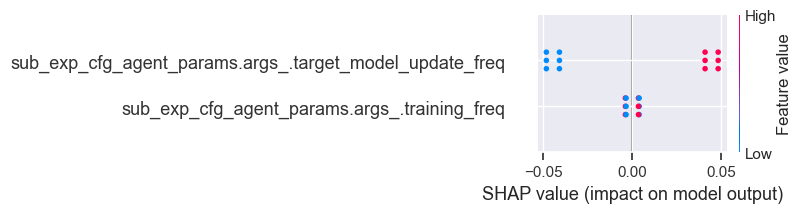

In [74]:
import shap
import xgboost
import pandas as pd


# Define the target metric and hyperparameter columns
target_metric = "episode_rewards_mean"  # Replace with actual metric column name
# Replace with actual hyperparameter column names

# Prepare data
X = sub_df[hyperparam_columns].apply(pd.to_numeric, errors='coerce')
y = sub_df[target_metric].fillna(3 * sub_df[target_metric].min())

# Train an XGBoost model to analyze feature importance
model = xgboost.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X, y)

# SHAP analysis
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X)

In [75]:
hyperparam_columns

['sub_exp_cfg_agent_params.args_.target_model_update_freq',
 'sub_exp_cfg_agent_params.args_.training_freq']

In [76]:
import plotly.express as px

# Define readable names for selected hyperparams
readable_names = {
    hyperparam_columns[0]: "noise",
    hyperparam_columns[1]: "size"
}

# Rename columns in a copy of the dataframe
plot_df = sub_df.rename(columns=readable_names)

# Assign new column names
x_col = "noise"
y_col = "episode_rewards_mean"
facet_col = "size"

# Plot
fig = px.scatter(
    plot_df,
    x=x_col,
    y=y_col,
    color="experiment_name",  # Optional: color by experiment
    facet_col=facet_col,
    title="Episode Rewards vs. Noise Faceted by Size",
    height=600
)

fig.update_layout(showlegend=False)
fig.show()
